In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

# Load customer data
customer_data = pd.DataFrame({
    'age': [35, 44, 22, 55, 33, 20, 68, 50, 27, 41],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'location': ['NY', 'CA', 'TX', 'NY', 'CA', 'TX', 'NY', 'CA', 'TX', 'NY'],
    'monthly_charges': [50, 70, 30, 80, 45, 25, 100, 60, 35, 90],
    'internet_service': ['Fiber optic', 'DSL', 'DSL', 'Fiber optic', 'DSL', 'DSL', 'Fiber optic', 'DSL', 'DSL', 'Fiber optic'],
    'phone_service': ['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes'],
    'tv_service': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes'],
    'churn': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes']
})


In [3]:
# Encode categorical features
customer_data_encoded = pd.get_dummies(customer_data)
print(customer_data_encoded)

   age  monthly_charges  gender_Female  gender_Male  location_CA  location_NY  \
0   35               50              0            1            0            1   
1   44               70              1            0            1            0   
2   22               30              0            1            0            0   
3   55               80              1            0            0            1   
4   33               45              0            1            1            0   
5   20               25              1            0            0            0   
6   68              100              0            1            0            1   
7   50               60              1            0            1            0   
8   27               35              0            1            0            0   
9   41               90              1            0            0            1   

   location_TX  internet_service_DSL  internet_service_Fiber optic  \
0            0                     0  

In [4]:
X = customer_data_encoded.iloc[:, :-2].values  
y = customer_data_encoded.iloc[:, -2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_test)

[[27 35  0  1  0  0  1  1  0  1  0  1  0]
 [44 70  1  0  1  0  0  1  0  1  0  1  0]
 [20 25  1  0  0  0  1  1  0  1  0  0  1]]


In [5]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [6]:
# Train decision tree model
model = DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(X_train, y_train)

# Predict on test data and calculate accuracy
print(X_test)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

[[-0.3307706  -0.43193421 -1.41421356  1.41421356 -0.70710678  0.
   0.70710678  0.          0.          0.          0.          0.70710678
  -0.70710678]
 [ 1.35615946  1.38218948  0.70710678 -0.70710678  1.41421356  0.
  -1.41421356  0.          0.          0.          0.          0.70710678
  -0.70710678]
 [-1.02538886 -0.95025527  0.70710678 -0.70710678 -0.70710678  0.
   0.70710678  0.          0.          0.          0.         -1.41421356
   1.41421356]]
Accuracy: 1.0


In [7]:
# Create confusion matrix and plot using seaborn
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 0]
 [0 2]]


In [8]:
# Encode categorical features for new customer data
new_customer_data = pd.DataFrame({
    'age': [35],
    'gender': ['Male'],
    'location': ['NY'],
    'monthly_charges': [50],
    'internet_service': ['Fiber optic'],
    'phone_service': ['Yes'],
    'tv_service': ['Yes']
})

# Create new dataframe with same columns as encoded data
new_customer_data_encoded = pd.DataFrame(columns=customer_data_encoded.columns)

# Concatenate new customer data to new dataframe
new_customer_data_encoded =pd.get_dummies(new_customer_data,columns=['gender', 'location', 'internet_service', 'phone_service', 'tv_service'])
missing_columns = set(customer_data_encoded.columns) - set(new_customer_data_encoded.columns)
missing_columns-=set(['churn_Yes','churn_No'])
for column in missing_columns:
  new_customer_data_encoded[column] = 0
new_customer_churn = model.predict(ss.transform( new_customer_data_encoded.values))

print(f"New customer churn prediction: {new_customer_churn[0]}")


New customer churn prediction: 0


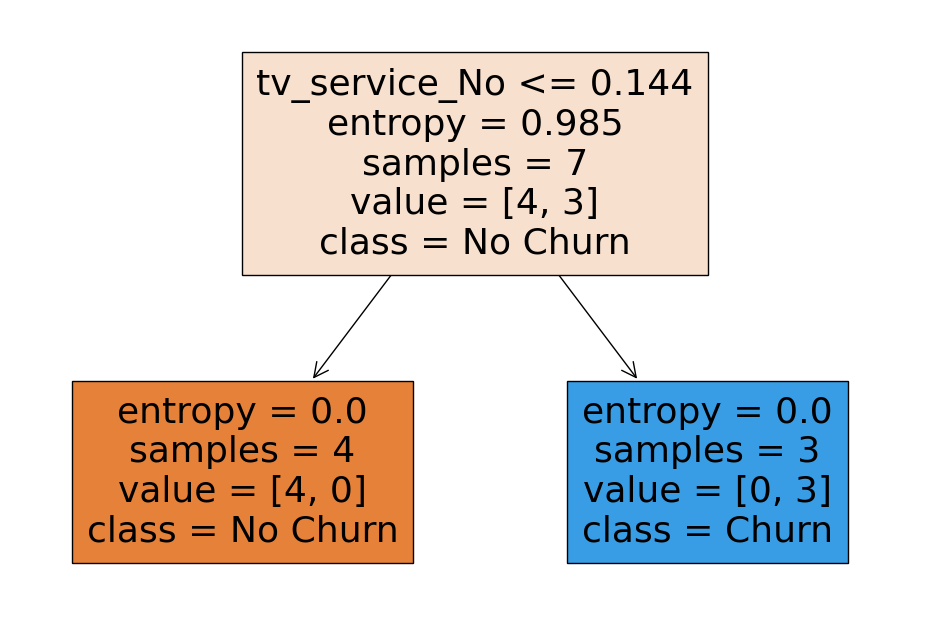

In [ ]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Visualize the decision tree
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=customer_data_encoded.columns[:-1], class_names=['No Churn', 'Churn'])
plt.show()
